# Heat

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   26nd of February 2024

Plates that have already subducted beneath the Earth’s lithosphere are commonly referred to as slabs. What drives their descent into the Earth’s mantle is the fact that their density typically remains larger than the density of the surrounding mantle for a long time, compared to the time it takes them to reach the core-mantle boundary.

As slabs sink into the mantle, they receive heat from the hotter surroundings through conduction, reducing its density contrast. On the other hand, slabs also experience progressively larger overburden pressure and phase changes. This process, instead, contributes to increase their density. While the process of compression and density increase due to pressure is virtually instantaneous, heat conduction has a typical time-scale ($\tau$), which we can approximate as follows:

The heat ($Q$) needed to raise the temperature of the unit-width slab subducted during an interval of time $\Delta t$ to the one of the surrounding mantle is:

$$Q = \rho_s \cdot C_p \cdot \Delta T \cdot H_s \cdot v_s \cdot \Delta t$$

where $\rho_s$ is the slab density, $C_p$ is the heat capacity, $\Delta T$ is the temperature difference between mantle and slab, $H_s$ is the thickness of the slab, and $v_s$ is the subduction rate.

Be reminded from class, that the heat-flow expression is:

$$q = K' \frac{\Delta T}{\Delta l}$$

where $K'$ is the thermal conductivity, $\Delta T$ is the temperature contrast between plate and mantle, and $\Delta l$ is the distance over which the temperature contrast exists.

The time it takes to raise the temperature of the unit-width slab to the temperature of the mantle through conduction (i.e. the it takes to reduce $\Delta T$ to 0) is simply:

$$\tau = \frac{Q}{q \cdot v_s \cdot \Delta t}$$

Consider the Capricorn plate, which subducts beneath Indonesia. Due to an extinct spreading center, this plate displays a somewhat uniform age of 50 Myr. Assume a subduction rate of $v_s=5cm/yr$, which for simplicity we will assume to remain constant through time. 


Using pen and paper, or with your own Jupyter Notebook, perform the following exercises: \\

1. Make a rough estimate for the thickness of the plate ($H_s$). Use one of the expression seen in class; assume a thermal diffusivity of $K = 1e-6~m^2/s$.
    
2. Make an estimation of the time ($\tau$) it takes to re-heat the plate to mantle temperatures, using typical values for the parameters involved: $\rho_s = 4000 kg/m^3$, $C_p = 1000 J~kg^{-1} ~^{\circ}C^{-1}$, $K' = 5~W~m^{-1}~^{\circ}C^{-1}$, $\Delta l = 100~km$.

3. On a simplified 2D scenario, how long would it take for the plate to reach the core--mantle boundary (COB)? Assume a subduction with a steady angle of 30$^{\circ}$.

4. Upon closer inspection, you realize that the Capricorn plate moves a rate closer to $1.9~cm/yr$ (present-day motion taken from REVEL and Exercises 4/6 approaches to surface velocity).

5. BONUS: With this levels of uncertainty, it might be worth evaluating a range of values for our parameters; take the angle of slab subduction for instance. What angle of slab subduction would reach the COB within your estimated time of re-heating. You can try a plot of \textit{angle vs time} or \textit{angle vs distance}. You could add another degree of freedom by evaluating a range of plate velocities (plot of \textit{angle vs plate velocity}).  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Plate thickness

k = 1e-6                            # thermal diffusivity in m2/s    
age_myr = 50                        # age of the plate in Myr
age_s = age_myr * 1e6 * 31536e3     # age of the plate in seconds
Hs = np.sqrt(age_s*k)           # thickness of the plate in meters

f"Thickness for a plate of age {age_myr} Myr: {Hs:.2f} meters"

'Thickness for a plate of age 50 Myr: 39708.94 meters'

In [4]:
# Parameters
rho_s = 4000      # density in kg/m3
Cp = 1000         # specific heat capacity in J/kg/C
Kp = 5            # thermal conductivity in W/m/C
deltaL = 100e3    # temperature contrast distance in m

t_s = (rho_s * Cp * Hs * deltaL) / (Kp)
t_myr = t_s / (1e6 * 3600 * 24 * 365)

f"Time for re-heating a plate of age {age_myr} Myr: {t_myr:.2f} Myr"

'Time for re-heating a plate of age 50 Myr: 100.73 Myr'

In [6]:
# Parameters
vel_cm_yr = 1.9               # cm/yr
vel_m_myr = vel_cm_yr * 1e4   # m/Myr
tetha_deg = 30                # degrees
dist_cob = 2889e3             # m


dist_m_myr = np.abs(np.sin(np.radians(tetha_deg))) * vel_m_myr
time_myr = dist_cob / dist_m_myr

f"Time for the plate subducting at rate {vel_cm_yr} cm/yr and angle {tetha_deg} degrees to reach COB depth: {time_myr:.2f} Myr"

'Time for the plate subducting at rate 1.9 cm/yr and angle 30 degrees to reach COB depth: 304.11 Myr'

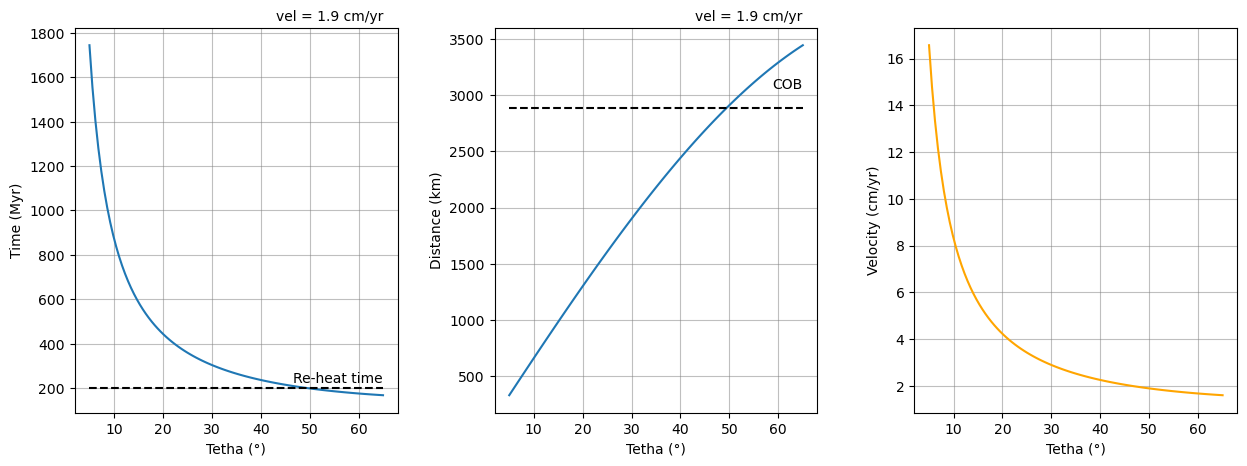

In [7]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={"wspace": 0.3})
ax1.grid(color="grey", alpha=0.5)
ax1.set(xlabel="Tetha (°)", ylabel="Time (Myr)")

ax2.grid(color="grey", alpha=0.5)
ax2.set(xlabel="Tetha (°)", ylabel="Distance (km)")

ax3.grid(color="grey", alpha=0.5)
ax3.set(xlabel="Tetha (°)", ylabel="Velocity (cm/yr)")


# Parameters
vel_cm_yr = 1.9               # cm/yr
vel_m_myr = vel_cm_yr * 1e4   # m/Myr
dist_cob = 2889e3             # m
t_myr = 200                   # Myr 
tetha_range = np.linspace(5, 65, 100)


# Plot 1
dist_m_myr = np.abs(np.sin(np.radians(tetha_range))) * vel_m_myr
time_myr = dist_cob / dist_m_myr

ax1.plot(tetha_range, time_myr)
ax1.plot([tetha_range[0], tetha_range[-1]], [t_myr, t_myr], '--k')
ymin, ymax = ax1.get_ylim()
ax1.text(tetha_range[-1], ymax*1.01, f"vel = {vel_cm_yr} cm/yr", fontsize=10, va="bottom", ha="right", clip_on=False)
ax1.text(tetha_range[-1], t_myr*1.05, "Re-heat time", fontsize=10, va="bottom", ha="right")


# Plot 2
dist_200myr = dist_m_myr * t_myr

ax2.plot(tetha_range, dist_200myr*1e-3)
ax2.plot([tetha_range[0], tetha_range[-1]], [dist_cob*1e-3, dist_cob*1e-3], '--k')
ymin, ymax = ax2.get_ylim()
ax2.text(tetha_range[-1], ymax*1.01, f"vel = {vel_cm_yr} cm/yr", fontsize=10, va="bottom", ha="right", clip_on=False)
ax2.text(tetha_range[-1], dist_cob*1e-3*1.05, "COB", fontsize=10, va="bottom", ha="right")


# Plot 3
vel_range = dist_cob / (np.abs(np.sin(np.radians(tetha_range))) * t_myr * 1e6) * 1e2
ax3.plot(tetha_range, vel_range, color="orange")